#***1. Configuración del ambiente***

In [ ]:
#Se definen las variables globales
global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

In [ ]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
##Verificación importación de librerías
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Numpy | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: numpy
Version: 1.23.5
------
Name: matplotlib
Version: 3.7.1


#***2. Obtención de datos***

In [ ]:
#Obtención valor Bitcoin de los últimos 7 días con intervalo de 5 minutos
import yfinance as yf
def importar_base_bitcoin():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  msft = yf.Ticker("BTC-USD")
  df_bitcoin = msft.history(period="7d", interval='5m')

  return df_bitcoin


In [ ]:
importar_base_bitcoin()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-10-26 00:00:00+00:00,34504.289062,34509.437500,34474.312500,34509.437500,0,0.0,0.0
2023-10-26 00:05:00+00:00,34479.105469,34521.175781,34474.617188,34505.679688,0,0.0,0.0
2023-10-26 00:10:00+00:00,34496.804688,34527.507812,34484.953125,34527.507812,317440,0.0,0.0
2023-10-26 00:15:00+00:00,34533.218750,34543.382812,34524.519531,34543.382812,0,0.0,0.0
2023-10-26 00:20:00+00:00,34548.535156,34554.820312,34537.343750,34554.820312,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-01 19:00:00+00:00,34598.875000,34633.671875,34598.875000,34624.160156,12288,0.0,0.0
2023-11-01 19:05:00+00:00,34624.683594,34657.812500,34624.683594,34633.812500,7108608,0.0,0.0
2023-11-01 19:10:00+00:00,34628.914062,34628.914062,34566.484375,34566.484375,10741760,0.0,0.0


In [ ]:
#Obtención precio actual y tendencia
from bs4 import BeautifulSoup
import requests
def extraer_tendencias():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'}
  url = "https://coinmarketcap.com/"
  respuesta = requests.get(url, headers=headers)
  soup = BeautifulSoup(respuesta.content, features='lxml')
  respuesta = soup.find('div', {'class':["sc-a0353bbc-0 gDrtaY", "sc-a0353bbc-0 gDrtaY rise", "sc-a0353bbc-0 gDrtaY fall"]}).getText()
  precio_actual = float(respuesta.strip('$').replace(',', '').strip())
  tendencia = soup.find('span', {'class':["sc-d55c02b-0 iwhBxy", "sc-d55c02b-0 gUnzUB", "icon-Caret-up", "icon-Caret-down"]})
  tendencia = str(tendencia)
  if(tendencia == '<span class="icon-Caret-up"></span>'):
    tendencia = 'Alta'
  elif(tendencia == '<span class="icon-Caret-down"></span>'):
    tendencia = 'Baja'


In [ ]:
extraer_tendencias()
print('Precio bitcoin: ', precio_actual)
print('Tendencia: ', tendencia)

Precio bitcoin:  34535.92
Tendencia:  Alta


#***3. Limpieza de datos***

In [ ]:
df_bitcoin_limpio = df_bitcoin.copy()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10,4))

<Axes: >

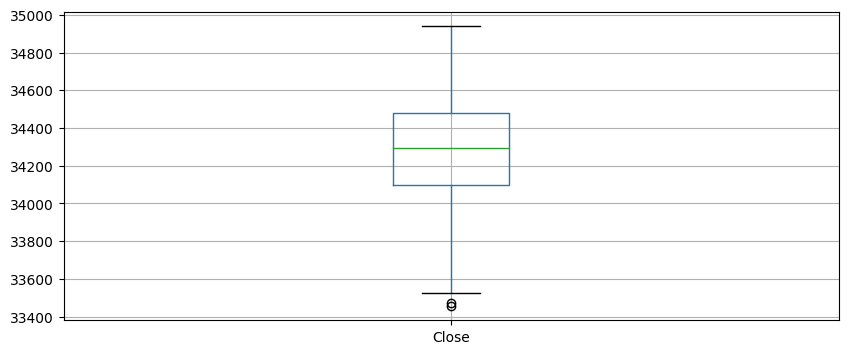

In [ ]:
df_bitcoin.boxplot(['Close'])

<Axes: >

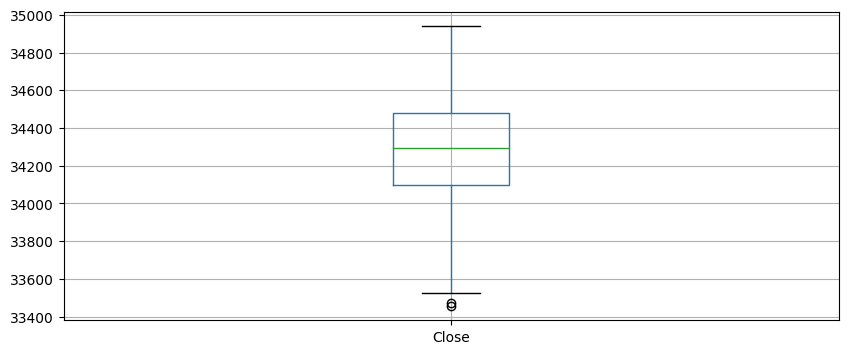

In [ ]:
df_bitcoin_limpio.boxplot(['Close'])

In [ ]:
valor = df_bitcoin_limpio['Close']

In [ ]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
print(Q1)
print(Q3)
print(IIQ)
print(limite_inferior)
print(limite_superior)

34097.52734375
34481.90625
384.37890625
33520.958984375
35058.474609375


In [ ]:
seleccion = ((valor >= Q1) & (valor <= Q3))

In [ ]:
df_bitcoin_limpio = df_bitcoin_limpio[seleccion]

<Axes: >

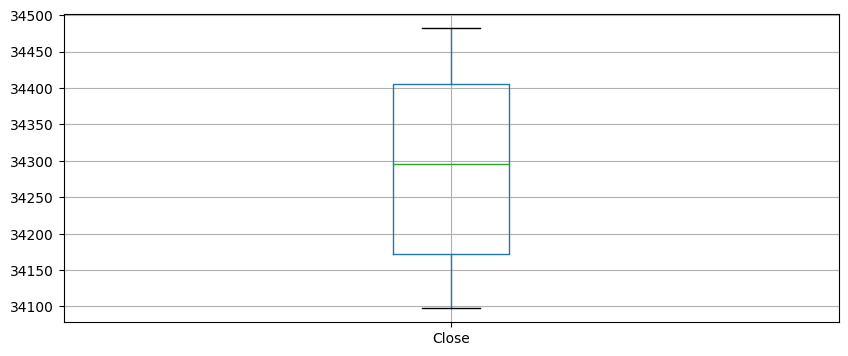

In [ ]:
df_bitcoin_limpio.boxplot(['Close'])

In [ ]:
#Se procede a limpiar el DataFrame
def limpieza_datos():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  df_bitcoin_limpio = df_bitcoin.copy()
  df_bitcoin_limpio.drop_duplicates()
  df_bitcoin_limpio['Close'].dropna()
  df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio['Volume'] > 0]
  df_bitcoin_limpio = df_bitcoin_limpio[(df_bitcoin_limpio['Close'] >= Q1) & (df_bitcoin_limpio['Close'] <= Q3)]
  media_bitcoin = df_bitcoin_limpio['Close'].mean()

  return media_bitcoin

In [ ]:
limpieza_datos()

34310.59535108025

In [ ]:
media_bitcoin

34310.59535108025

#***4. Tomar decisiones***

In [ ]:
#Se desarrolla el algoritmo para la toma de decisón por parte del Robot
def tomar_decisiones():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  if((precio_actual >= limpieza_datos()) & (tendencia == 'Baja')):
    algoritmo_decision = 'Vender'
  elif((precio_actual < limpieza_datos()) & (tendencia == 'Alta')):
    algoritmo_decision = 'Comprar'
  else:
    algoritmo_decision = 'Esperar'

    return algoritmo_decision


#***5. Visualización***

In [ ]:
#Se configura la interfaz gráfica para ver los resultados en pantalla
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(16,5))
def visualizacion():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  df_bitcoin['Promedio'] = media_bitcoin
  plt.plot.xlabel = df_bitcoin.index
  x = plt.plot.xlabel
  plt.plot.ylabel = df_bitcoin.Close
  y = plt.plot.ylabel
  z = df_bitcoin.Promedio
  plt.plot(x,y,z)
  plt.title('Precio de Bitcoin')
  plt.annotate(f'Decisión: {algoritmo_decision}', xy=(df_bitcoin.index[-1], df_bitcoin['Close'].iloc[-1]), xytext=(df_bitcoin.index[-1], df_bitcoin['Close'].iloc[-1]),
              arrowprops=dict(facecolor='black', shrink=0.5), fontsize=12)
  plt.show()

#***6. Automatización***

In [ ]:
from IPython.display import clear_output
import time

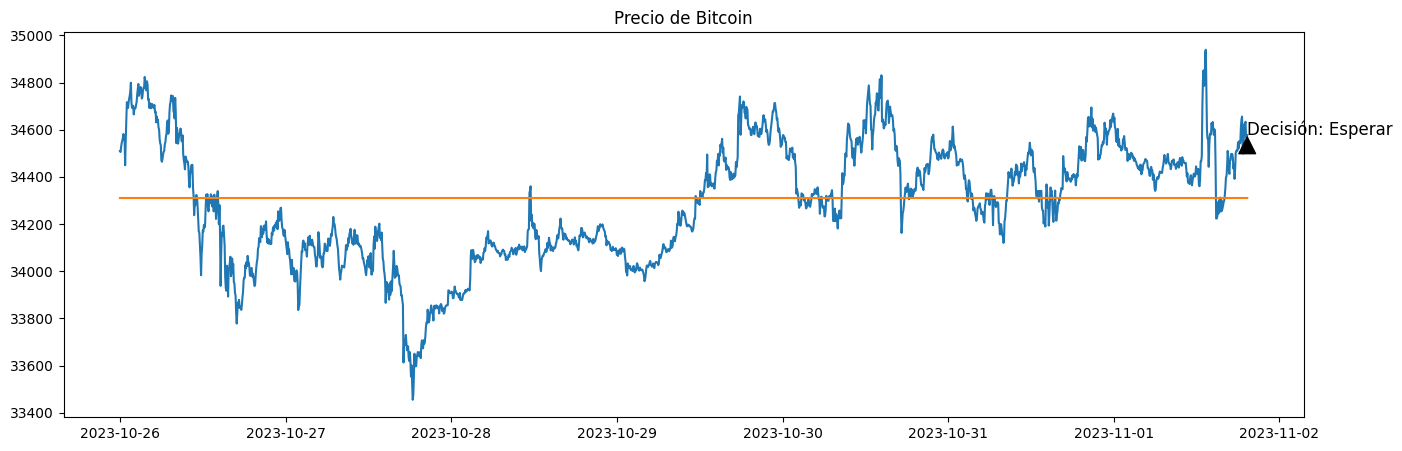

KeyboardInterrupt: ignored

In [ ]:
#Se automatiza el proceso
while(True):
  clear_output()
  importar_base_bitcoin()
  extraer_tendencias()
  limpieza_datos()
  tomar_decisiones()
  visualizacion()
  time.sleep(300)